In [1]:
# import pysam
# from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
regions={'split_chr13_xaa': [[16000187, 18181463]],
 'split_chr2_xav': [[91720904, 94530414]],
 'split_chr3_xau': [[90362505, 91477491]],
 'split_chr1_xba': [[121579777, 123992934]],
 'split_chr1_xbb': [[123992935, 124938490]]}

In [3]:
#chr13
less_95_xs_chr13=[]
less_95_ys_chr13=[]
from_95_to_99_xs_chr13=[]
from_95_to_99_ys_chr13=[]
from_99_to_999_xs_chr13=[]
from_99_to_999_ys_chr13=[]
larger_than_999_xs_chr13=[]
larger_than_999_ys_chr13=[]
#chr2
less_95_xs_chr2=[]
less_95_ys_chr2=[]
from_95_to_99_xs_chr2=[]
from_95_to_99_ys_chr2=[]
from_99_to_999_xs_chr2=[]
from_99_to_999_ys_chr2=[]
larger_than_999_xs_chr2=[]
larger_than_999_ys_chr2=[]
#chr3
less_95_xs_chr3=[]
less_95_ys_chr3=[]
from_95_to_99_xs_chr3=[]
from_95_to_99_ys_chr3=[]
from_99_to_999_xs_chr3=[]
from_99_to_999_ys_chr3=[]
larger_than_999_xs_chr3=[]
larger_than_999_ys_chr3=[]
#chr1_xba
less_95_xs_chr1_xba=[]
less_95_ys_chr1_xba=[]
from_95_to_99_xs_chr1_xba=[]
from_95_to_99_ys_chr1_xba=[]
from_99_to_999_xs_chr1_xba=[]
from_99_to_999_ys_chr1_xba=[]
larger_than_999_xs_chr1_xba=[]
larger_than_999_ys_chr1_xba=[]
#chr1_xbb
less_95_xs_chr1_xbb=[]
less_95_ys_chr1_xbb=[]
from_95_to_99_xs_chr1_xbb=[]
from_95_to_99_ys_chr1_xbb=[]
from_99_to_999_xs_chr1_xbb=[]
from_99_to_999_ys_chr1_xbb=[]
larger_than_999_xs_chr1_xbb=[]
larger_than_999_ys_chr1_xbb=[]

In [4]:
def getmaxindices(allp,num):
    # 先获取列表中前100个最大的值及其索引
    max_values_and_indices = sorted(enumerate(allp), key=lambda x: x[1],reverse=True)[:num]

    # 再从这100个最大值中提取出索引
    max_indices = [index for index, value in max_values_and_indices]
    return max_indices

In [5]:
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr13_xaa.csv ../csvfiles/pos_prob_split_chr13_xaa.csv
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr2_xav.csv ../csvfiles/pos_prob_split_chr2_xav.csv
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr3_xau.csv ../csvfiles/pos_prob_split_chr3_xau.csv


ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr13_xaa.csv': File exists
ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr2_xav.csv': File exists
ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr3_xau.csv': File exists


In [6]:
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr1_xbb.csv ../csvfiles/pos_prob_split_chr1_xbb.csv
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr1_xba.csv ../csvfiles/pos_prob_split_chr1_xba.csv


ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr1_xbb.csv': File exists
ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr1_xba.csv': File exists


In [9]:
df_mhc_pos_path

,Unnamed: 0,P0,P1,P00,P11,P
0,16000187,0.998876,0.201124,0.997189,0.000000,-0.000813
1,16000200,0.999250,0.200750,0.998126,0.000000,-0.000541
2,16000214,0.973392,0.226608,0.933479,0.000000,-0.020065
3,16000271,0.999750,0.200250,0.999375,0.000000,-0.000180
4,16000295,0.999750,0.200250,0.999375,0.000000,-0.000180
...,...,...,...,...,...,...
105530,19422671,0.999750,0.200250,0.999375,0.000000,-0.000180
105531,19422691,0.528420,0.671580,0.260150,0.439101,-0.043528
105532,19422733,0.999750,0.200250,0.999375,0.000000,-0.000180
105533,19422745,0.202873,0.997127,0.000000,0.992817,-0.002083


In [11]:
#chr13_xaa
#[16000187, 18181463]
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr13_xaa.csv")
positions1=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=16000187)&(df_mhc_pos_path["Unnamed: 0"]<=18181463)]["Unnamed: 0"].to_list()
Ps1=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=16000187)&(df_mhc_pos_path["Unnamed: 0"]<=18181463)]["P"].to_list()
midpvalue=[]
mean_arr=-0.017462454026226405
std_arr=0.006996042091888453
for prob in Ps1:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr13.append(positions1[i])
        less_95_ys_chr13.append(Ps1[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr13.append(positions1[i])
        from_95_to_99_ys_chr13.append(Ps1[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr13.append(positions1[i])
        from_99_to_999_ys_chr13.append(Ps1[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr13.append(positions1[i])
        larger_than_999_ys_chr13.append(Ps1[i])

In [14]:
#chr2_xav
#[91720904, 94530414]
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr2_xav.csv")
positions2=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=91720904)&(df_mhc_pos_path["Unnamed: 0"]<=94530414)]["Unnamed: 0"].to_list()
Ps2=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=91720904)&(df_mhc_pos_path["Unnamed: 0"]<=94530414)]["P"].to_list()
midpvalue=[]
mean_arr=-0.017462454026226405
std_arr=0.006996042091888453
for prob in Ps2:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr2.append(positions2[i])
        less_95_ys_chr2.append(Ps2[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr2.append(positions2[i])
        from_95_to_99_ys_chr2.append(Ps2[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr2.append(positions2[i])
        from_99_to_999_ys_chr2.append(Ps2[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr2.append(positions2[i])
        larger_than_999_ys_chr2.append(Ps2[i])

In [24]:
#split_chr3_xau
#[90362505, 91477491]
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr3_xau.csv")
positions3=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=90362505)&(df_mhc_pos_path["Unnamed: 0"]<=91477491)]["Unnamed: 0"].to_list()
Ps3=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=90362505)&(df_mhc_pos_path["Unnamed: 0"]<=91477491)]["P"].to_list()
midpvalue=[]
mean_arr=-0.017462454026226405
std_arr=0.006996042091888453
for prob in Ps3:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr3.append(positions3[i])
        less_95_ys_chr3.append(Ps3[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr3.append(positions3[i])
        from_95_to_99_ys_chr3.append(Ps3[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr3.append(positions3[i])
        from_99_to_999_ys_chr3.append(Ps3[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr3.append(positions3[i])
        larger_than_999_ys_chr3.append(Ps3[i])


In [15]:
#chr1_xba
#[121579777, 123992934]
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr1_xba.csv")
positions4=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=121579777)&(df_mhc_pos_path["Unnamed: 0"]<=123992934)]["Unnamed: 0"].to_list()
Ps4=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=121579777)&(df_mhc_pos_path["Unnamed: 0"]<=123992934)]["P"].to_list()
midpvalue=[]
mean_arr=-0.017462454026226405
std_arr=0.006996042091888453
for prob in Ps4:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr1_xba.append(positions4[i])
        less_95_ys_chr1_xba.append(Ps4[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr1_xba.append(positions4[i])
        from_95_to_99_ys_chr1_xba.append(Ps4[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr1_xba.append(positions4[i])
        from_99_to_999_ys_chr1_xba.append(Ps4[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr1_xba.append(positions4[i])
        larger_than_999_ys_chr1_xba.append(Ps4[i])


In [16]:
#chr1_xbb
#[123992935, 124938490]
df_mhc_pos_path=pd.read_csv("../csvfiles/pos_prob_split_chr1_xbb.csv")
positions5=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=123992935)&(df_mhc_pos_path["Unnamed: 0"]<=124938490)]["Unnamed: 0"].to_list()
Ps5=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=123992935)&(df_mhc_pos_path["Unnamed: 0"]<=124938490)]["P"].to_list()
midpvalue=[]
mean_arr=-0.017462454026226405
std_arr=0.006996042091888453
for prob in Ps5:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr1_xbb.append(positions5[i])
        less_95_ys_chr1_xbb.append(Ps5[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr1_xbb.append(positions5[i])
        from_95_to_99_ys_chr1_xbb.append(Ps5[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr1_xbb.append(positions5[i])
        from_99_to_999_ys_chr1_xbb.append(Ps5[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr1_xbb.append(positions5[i])
        larger_than_999_ys_chr1_xbb.append(Ps5[i])


In [17]:

zipped_color_list={'ACB': [0.6199018140222545, 0.8273394036727978, 0.07681613835781242],
 'ASW': [0.5231784384407372, 0.5355615576319177, 0.6085573417584578],
 'All': [0.7478976414894968, 0.8581108654424285, 0.8152857852705114],
 'BEB': [0.7702098515876681, 0.34699071947424787, 0.387557687328841],
 'CDX': [0.9944848698557753, 0.4319680883089101, 0.6095703728222707],
 'CEU': [0.22146321845482853, 0.31820344771967357, 0.7921193188659656],
 'CHB': [0.09339120026575065, 0.49739737967690656, 0.9879237745701328],
 'CHS': [0.8750564664998141, 0.7338069529165195, 0.3058546593690403],
 'CLM': [0.737704221385458, 0.9209172916347589, 0.6000025255900048],
 'ESN': [0.03209678227783541, 0.8030222283085109, 0.30596638618321637],
 'FIN': [0.8623378159467614, 0.2079200577555228, 0.008672028349016814],
 'GBR': [0.4251541312392182, 0.3490460463116365, 0.8786460080999065],
 'GIH': [0.7525268826984933, 0.5333121198983907, 0.538554551310322],
 'GWD': [0.2627011188835271, 0.92851968237643, 0.4864089750510442],
 'IBS': [0.25115312032131665, 0.5397035754901451, 0.13380587437193459],
 'ITU': [0.9450480442890117, 0.5394575598574127, 0.8623826849068229],
 'JPT': [0.21405238204705113, 0.540757391337697, 0.08806809839137131],
 'KHV': [0.22561371426433752, 0.9164305579097723, 0.7907538310971419],
 'LWK': [0.20274923299053582, 0.4890267202072731, 0.8462139375324359],
 'MSL': [0.9951137970829559, 0.7005950908445686, 0.4989189517572168],
 'MXL': [0.3259201021356801, 0.8130093336742588, 0.9240844242162518],
 'PEL': [0.9871886206772149, 0.5709065709740972, 0.6773178323861238],
 'PJL': [0.6308240514007377, 0.7852668712542968, 0.7819736701998831],
 'PUR': [0.26909568610792434, 0.31557713998302317, 0.4779229844775781],
 'STU': [0.758551169090893, 0.8611540303381624, 0.3997187576590727],
 'TSI': [0.7384421240805822, 0.37820822943132903, 0.9005885384692488],
 'YRI': [0.42363231438946425, 0.7813235433022089, 0.8635294700674911]}


less_95 = zipped_color_list['YRI']
from_95_to_99 = zipped_color_list['TSI']
from_99_to_999 = zipped_color_list['CDX']
larger_than_999 = zipped_color_list['MSL']

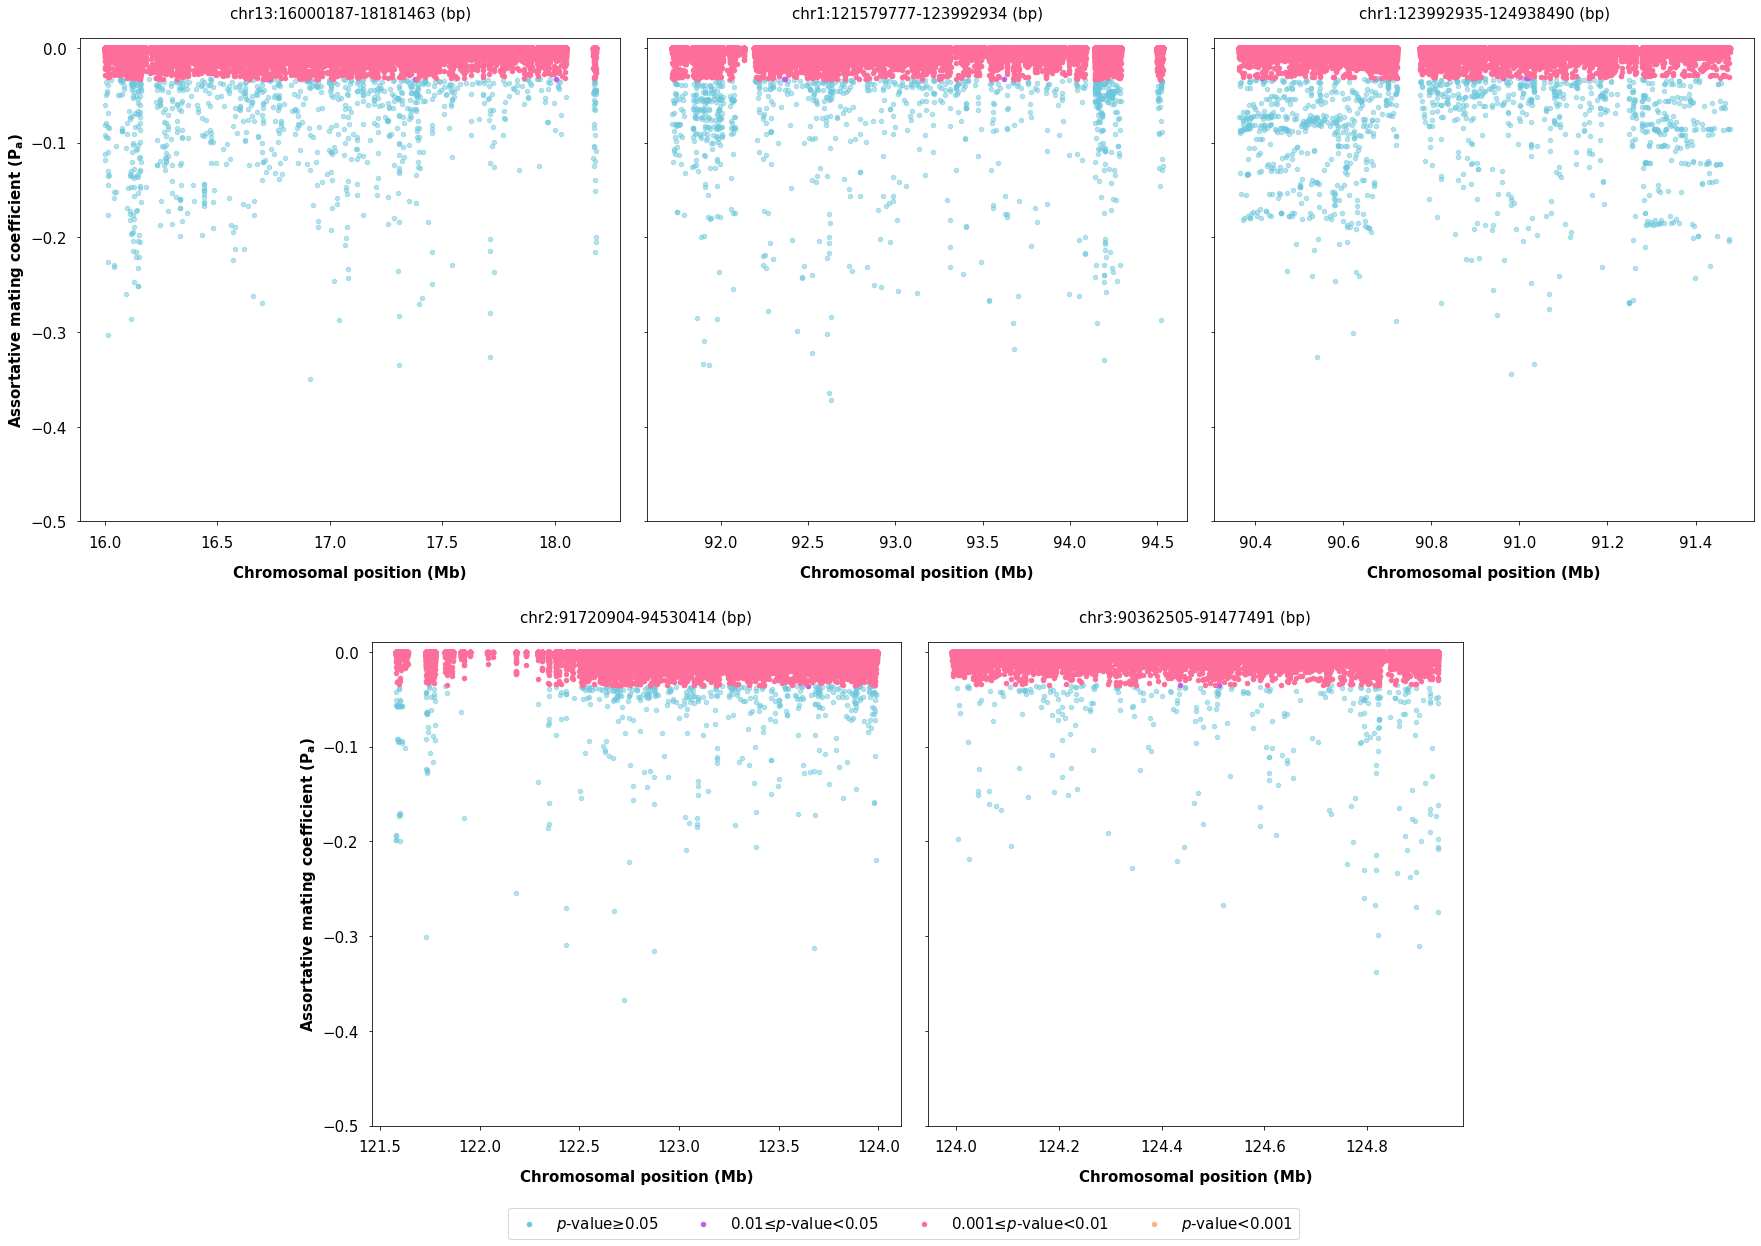

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linewidth'] = 1.2
plt.rcParams['mathtext.default'] = 'regular'
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(30, 20), facecolor='white')

axes[0,0].scatter(np.array(less_95_xs_chr13)/ 1000000, less_95_ys_chr13, color=less_95, s=20, label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[0,0].scatter(np.array(from_95_to_99_xs_chr13)/ 1000000, from_95_to_99_ys_chr13, color=from_95_to_99, s=20, label="0.01≤$\mathit{p}$-value<0.05")
axes[0,0].scatter(np.array(from_99_to_999_xs_chr13)/ 1000000, from_99_to_999_ys_chr13, color=from_99_to_999, s=20, label="0.001≤$\mathit{p}$-value<0.01")
axes[0,0].scatter(np.array(larger_than_999_xs_chr13)/ 1000000, larger_than_999_ys_chr13, color=larger_than_999, s=20, label="$\mathit{p}$-value<0.001")
# axes[0].legend(loc="best")
axes[0,0].set_title(f'chr13:16000187-18181463 (bp)',fontsize=15,pad=20)#chr1_xak


# index2 = getmaxindices(Ps1, 1)[0]
# x_max_pos = positions1[index2]/ 1000000
# y_max = Ps1[index2]
# y_max = float(format(y_max, '.5f'))
# # axes[0].text(x_max_pos, y_max, (x_max_pos, y_max), color=larger_than_999, fontsize=12)
# axes[0,0].text(x_max_pos, y_max+0.01, f'(rs1957632615, {r"$P_a$"}={y_max})',color=larger_than_999,fontsize=15, style='italic', weight = 'bold')


axes[0,1].scatter(np.array(less_95_xs_chr2)/ 1000000, less_95_ys_chr2, color=less_95, s=20,label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[0,1].scatter(np.array(from_95_to_99_xs_chr2)/ 1000000, from_95_to_99_ys_chr2, color=from_95_to_99, s=20,label="0.01≤$\mathit{p}$-value<0.05")
axes[0,1].scatter(np.array(from_99_to_999_xs_chr2)/ 1000000, from_99_to_999_ys_chr2, color=from_99_to_999, s=20,label="0.001≤$\mathit{p}$-value<0.01")
axes[0,1].scatter(np.array(larger_than_999_xs_chr2)/ 1000000, larger_than_999_ys_chr2, color=larger_than_999, s=20,label="$\mathit{p}$-value<0.001")
# legend = axes[1].legend(loc="lower left", bbox_to_anchor=(-0.25, -0.2),ncol=4)
# for lh in legend.legendHandles: 
#     lh.set_alpha(1)
#     lh._sizes = [20] 
axes[0,1].set_title(f'chr1:121579777-123992934 (bp)',fontsize=15,pad=20)#chr1_xak

# index2 = getmaxindices(Ps2, 1)[0]
# x_max_pos = positions2[index2]/ 1000000
# y_max = Ps2[index2]
# y_max = float(format(y_max, '.5f'))
# axes[0,1].text(x_max_pos, y_max+0.01, f'(rs1188100847, {r"$P_a$"}={y_max})',color=larger_than_999,fontsize=15, style='italic', weight = 'bold')


axes[0,2].scatter(np.array(less_95_xs_chr3)/ 1000000, less_95_ys_chr3, color=less_95, s=20,label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[0,2].scatter(np.array(from_95_to_99_xs_chr3)/ 1000000, from_95_to_99_ys_chr3, color=from_95_to_99, s=20,label="0.01≤$\mathit{p}$-value<0.05")
axes[0,2].scatter(np.array(from_99_to_999_xs_chr3)/ 1000000, from_99_to_999_ys_chr3, color=from_99_to_999, s=20,label="0.001≤$\mathit{p}$-value<0.01")
axes[0,2].scatter(np.array(larger_than_999_xs_chr3)/ 1000000, larger_than_999_ys_chr3, color=larger_than_999, s=20,label="$\mathit{p}$-value<0.001")
# axes[2].legend( loc="best")
axes[0,2].set_title(f'chr1:123992935-124938490 (bp)',fontsize=15,pad=20)#chr1_xak


# index3 = getmaxindices(Ps3, 1)[0]
# x_max_pos = positions3[index3]/ 1000000
# y_max = Ps3[index3]
# y_max = float(format(y_max, '.5f'))
# # axes[2].text(x_max_pos, y_max, (x_max_pos, y_max), color=larger_than_999, fontsize=15)
# axes[0,2].text(x_max_pos, y_max+0.01, f'(rs512442665821, {r"$P_a$"}={y_max})',color=larger_than_999,fontsize=15, style='italic', weight = 'bold')


axes[1,0].scatter(np.array(less_95_xs_chr1_xba)/ 1000000, less_95_ys_chr1_xba, color=less_95, s=20, label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[1,0].scatter(np.array(from_95_to_99_xs_chr1_xba)/ 1000000, from_95_to_99_ys_chr1_xba, color=from_95_to_99, s=20, label="0.01≤$\mathit{p}$-value<0.05")
axes[1,0].scatter(np.array(from_99_to_999_xs_chr1_xba)/ 1000000, from_99_to_999_ys_chr1_xba, color=from_99_to_999, s=20, label="0.001≤$\mathit{p}$-value<0.01")
axes[1,0].scatter(np.array(larger_than_999_xs_chr1_xba)/ 1000000, larger_than_999_ys_chr1_xba, color=larger_than_999, s=20, label="$\mathit{p}$-value<0.001")
# axes[0].legend(loc="best")
axes[1,0].set_title(f'chr2:91720904-94530414 (bp)',fontsize=15,pad=20)#chr1_xak


# index2 = getmaxindices(Ps4, 1)[0]
# x_max_pos = positions4[index2]/1000000
# y_max = Ps4[index2]
# y_max = float(format(y_max, '.5f'))
# axes[1,0].text(x_max_pos , y_max+0.01,  f'(rs796883451, {r"$P_a$"}={y_max})', color=larger_than_999,fontsize=15, style='italic', weight = 'bold')

axes[1, 1].scatter(np.array(less_95_xs_chr1_xbb)/ 1000000, less_95_ys_chr1_xbb, color=less_95, s=20,label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[1, 1].scatter(np.array(from_95_to_99_xs_chr1_xbb)/ 1000000, from_95_to_99_ys_chr1_xbb, color=from_95_to_99, s=20,label="0.01≤$\mathit{p}$-value<0.05")
axes[1, 1].scatter(np.array(from_99_to_999_xs_chr1_xbb)/ 1000000, from_99_to_999_ys_chr1_xbb, color=from_99_to_999, s=20,label="0.001≤$\mathit{p}$-value<0.01")
axes[1, 1].scatter(np.array(larger_than_999_xs_chr1_xbb)/ 1000000, larger_than_999_ys_chr1_xbb, color=larger_than_999, s=20,label="$\mathit{p}$-value<0.001")
legend = axes[1, 1].legend(loc="lower left", bbox_to_anchor=(-0.8, -0.25),ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [20] 
axes[1,1].set_title(f'chr3:90362505-91477491 (bp)',fontsize=15,pad=20)#chr1_xak


# index2 = getmaxindices(Ps5, 1)[0]
# x_max_pos = positions5[index2]/1000000
# y_max = Ps5[index2]
# y_max = float(format(y_max, '.5f'))
# axes[1, 1].text(x_max_pos, y_max+0.01, f'(rs1281323272, {r"$P_a$"}={y_max})', color=larger_than_999,fontsize=15, style='italic', weight = 'bold')

max_y = 0.01
axes[0,0].set_ylim(-0.5, max_y)
# yticks = np.linspace(-0.25, max_y, num=5)
# axes[0].set_yticks(yticks)


for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=15, pad=10)


axes[0,0].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
axes[0,0].set_ylabel(r"Assortative mating coefficient ($P_a$)",fontsize=15, weight = 'bold')
axes[0,1].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
axes[0,2].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
axes[1,0].set_ylabel(r"Assortative mating coefficient ($P_a$)",fontsize=15, weight = 'bold')
axes[1,0].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
axes[1,1].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)

# fig.suptitle('Positive-assortative mating MHC regions', fontsize=30, y=1)
plt.subplots_adjust(wspace=0.05, hspace=0.25)
# print(axes[1,0].get_position().get('x'))
pos = list(np.array(axes[1,0].get_position()).flatten())
pos[0] = pos[0] + 0.135
pos[2] = pos[2] - 0.13
pos[3] = pos[3] - 0.125
axes[1,0].set_position(pos)
# axes[1,2].set_position([0,0.6,0,0])

pos = list(np.array(axes[1,1].get_position()).flatten())
pos[0] = pos[0] + 0.13
pos[2] = pos[2] - 0.39
pos[3] = pos[3] - 0.125
axes[1,1].set_position(pos)

axes[1,2].remove()

#plt.savefig("../Figures/pic1_0611_mhc.png",dpi=300)
#plt.savefig("../Figures/pic1_0626_mhc.png",dpi=300)
#plt.savefig("pic1_sim.pdf")
# plt.savefig("pic1_part1.jpg",dpi=300)
plt.savefig("pic1.pdf",dpi=600, bbox_inches='tight')
plt.show()
